In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
%matplotlib inline

tf.set_random_seed(17)
np.random.seed(31)

Using TensorFlow backend.


In [2]:
img_size = 100
batch_size = 64

In [3]:
df = pd.read_csv('/home/kurianbwnoy/Data/Ratuken_data/training-data/train.csv')
df.describe()


,40
count,554655.000000
mean,23.051286
std,14.343637
min,0.000000
25%,10.000000
50%,27.000000
75%,37.000000
max,42.000000


In [4]:
df.head()

,1000000965.jpg,40
0,1310005493.jpg,31
1,1050002320.jpg,37
2,1340001721.jpg,33
3,1650001155.jpg,3
4,1170004207.jpg,37


In [11]:
def id_to_tensor(id):
    img_path = '/home/kurianbwnoy/Data/Ratuken_data/training-data/train-images/' + str(id)
    img = image.load_img(img_path, target_size=(img_size, img_size, 3))
    x = image.img_to_array(img)
    return x/255

In [12]:
def flow_from_ids(ids, batch_size):
    imgs = []
    labels = []
    while True:
        for id in ids:
            imgs.append(id_to_tensor(id))
            labels.append(to_categorical(df['target'][id],num_classes=43))
            if len(imgs)>=batch_size:
                yield np.array(imgs), np.array(labels)
                imgs, labels=[], []

In [13]:


label_dict = {2:"Sweets",
33:"Meat",
37:"Vegetables",
41:"Fish",
38:"Casserole",
1:"Bento",
20:"Egg_dish",
11:"Source_·_Seasoning_·_Dressing",
40:"A_drink",
16:"Popular_menu",
42:"Noodle_/_powder_dishes",
28:"Soup_and_soup",
3:"Rice_stuff",
5:"Other_ingredients",
22:"Soybean_/_tofu",
12:"Pasta",
23:"Classic_meat_dish",
10:"Salad",
15:"Chinese_cuisine",
13:"Bread",
0:"New_Year_dishes",
9:"Christmas",
24:"Classic_fish_dishes",
19:"Winter_December_February",
27:"Fruit",
36:"Kitchenware",
7:"Italian_food",
4:"Other_purpose_·_scene",
25:"Local_cuisine_throughout_Japan",
29:"Okinawa_cuisine",
6:"Hina_Matsuri",
18:"Health_food",
39:"Korean_cuisine",
34:"Event_/_Event",
26:"Spring_March_to_May",
14:"French_cuisine",
32:"Easy_cooking",
30:"Fall_September_November",
17:"Today's_menu",
21:"Summer_June_August",
35:"Western_cuisine",
8:"Ethnic_dishes_·_Latin_America",
31:"Saving_food",
}



FileNotFoundError: [Errno 2] No such file or directory: '/home/kurianbwnoy/Data/Ratuken_data/training-data/train-images/0'

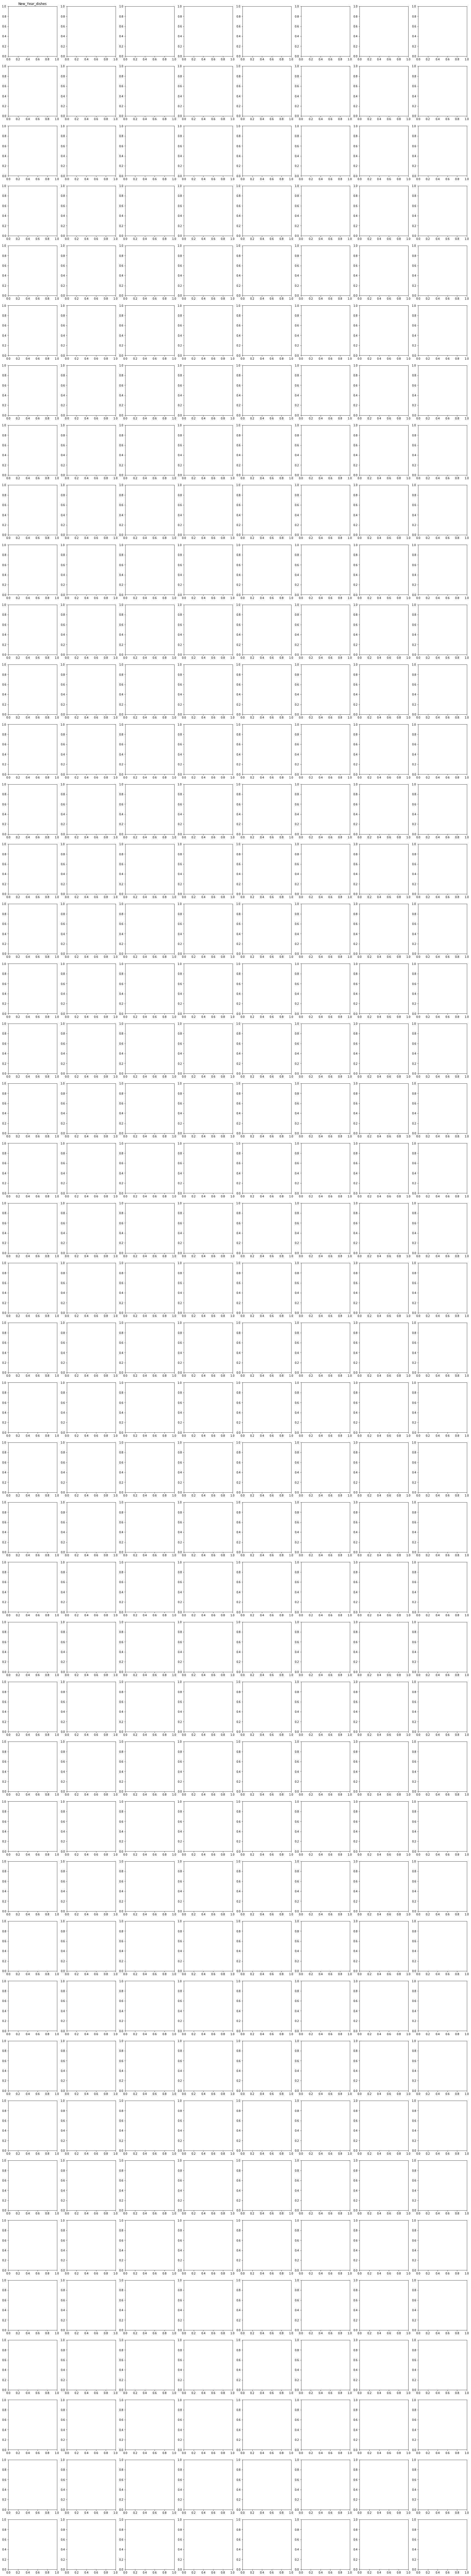

In [10]:
df.index+1

RangeIndex(start=1, stop=554656, step=1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kurianbwnoy/Data/Ratuken_data/training-data/train-images/0'

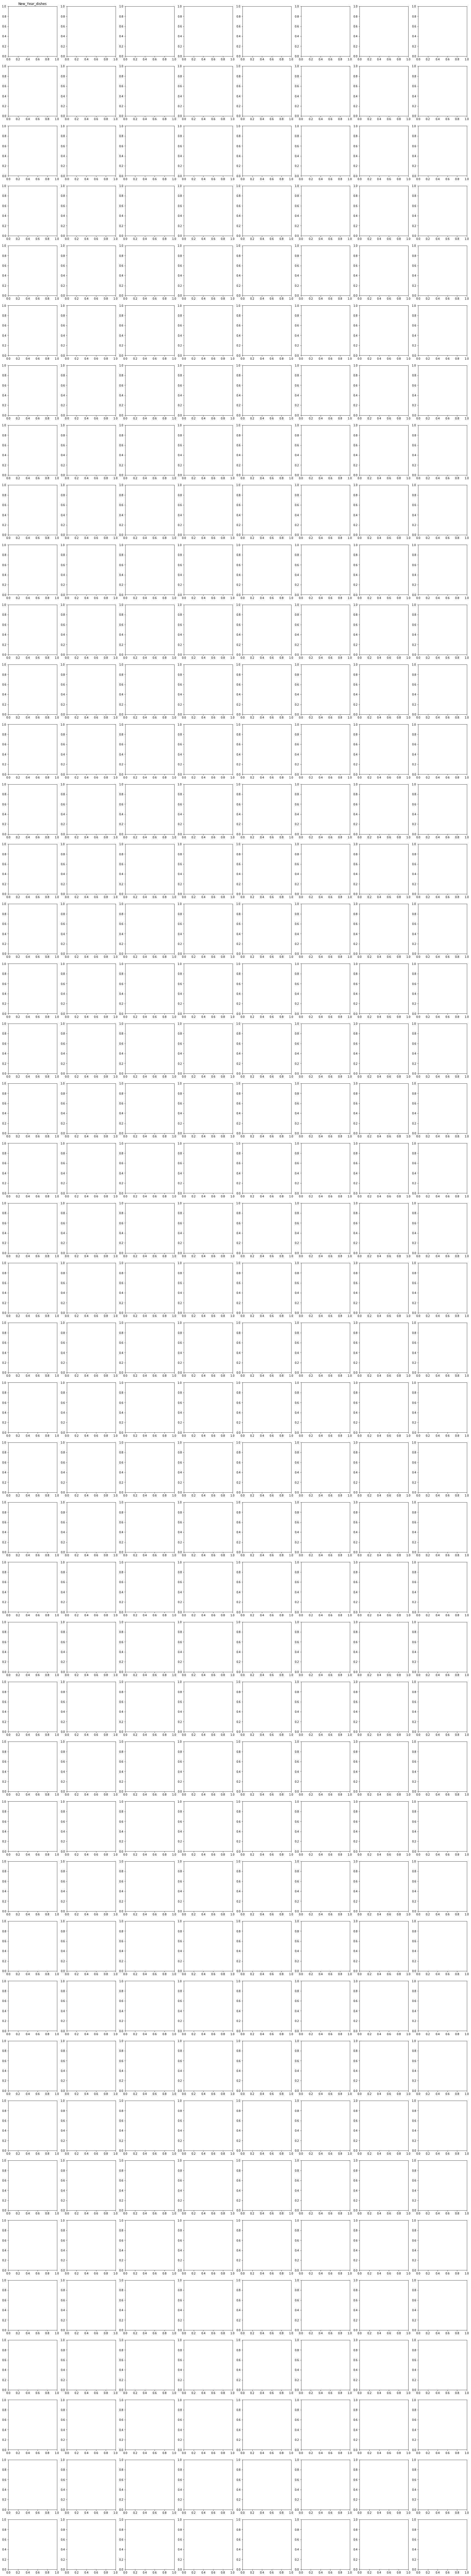

In [16]:
generator = flow_from_ids(df.index,)

num_classes_to_show = 43

fig, ax = plt.subplots(num_classes_to_show,8,figsize=(30,4*num_classes_to_show))

for i in range(num_classes_to_show):
    count = 0
    ax[i][0].set_title(label_dict[i])
    while count < 8:
        images, labels = next(generator)
        if (np.argmax(labels[0]) == i):
            ax[i][count].imshow(images[0])
            count += 1
        
plt.show()